In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#download data
url = 'https://raw.githubusercontent.com/fourth/datascience_technical_exercise/main/TestData.csv?token=ASCTU4N4UIVPNFP3OXVLRE3ATYWR2'
df = pd.read_csv(url)
print("Read {} rows.".format(len(df)))

Read 95666 rows.


In [3]:
#add names to columns
df.columns = [
	'location',
	'date',
	'sales'
]

#change format of float
pd.options.display.float_format = '{: .2f}'.format

In [4]:
#Check if there is missing data
for c in df.columns:
    print("%30s : %d"%(c, sum(pd.isnull(df[c]))))
#result -> no missing data (N/As)

                      location : 0
                          date : 0
                         sales : 0


In [5]:
#Check important information about sales data
sales = df['sales']
sales.describe()

count    95666.00
mean      2536.05
std       1655.54
min        -99.60
25%       1492.21
50%       2107.69
75%       3109.36
max      24770.63
Name: sales, dtype: float64

In [6]:
#LOCATIONS WITH MIN AND MAX SALES
print("Location with the maximum sales")
print(df.max())

print("Location with the minimum sales")
df.min()

Location with the maximum sales
location         15512
date        2019-12-31
sales         24770.63
dtype: object
Location with the minimum sales


location          9708
date        2017-12-01
sales           -99.60
dtype: object

In [7]:
#Average, minimum and maximum sales per location
df.groupby('location').agg({'sales': ['mean', 'min', 'max']})

sales                   
             mean      min       max
location                            
9708      2875.74    -5.13   8887.81
9710      4313.79     0.00   9411.17
9712      2021.04     0.00   5106.68
9714      6204.56    -1.83  19834.23
9716      3928.61     3.97  11421.77
...           ...      ...       ...
14775     4574.25   -10.37  11698.80
14786     2839.50     0.00   5458.66
14793     2752.76    16.53   5180.57
15505     3139.75  1041.80   4959.11
15512     2999.46     0.00   5015.43

[163 rows x 3 columns]

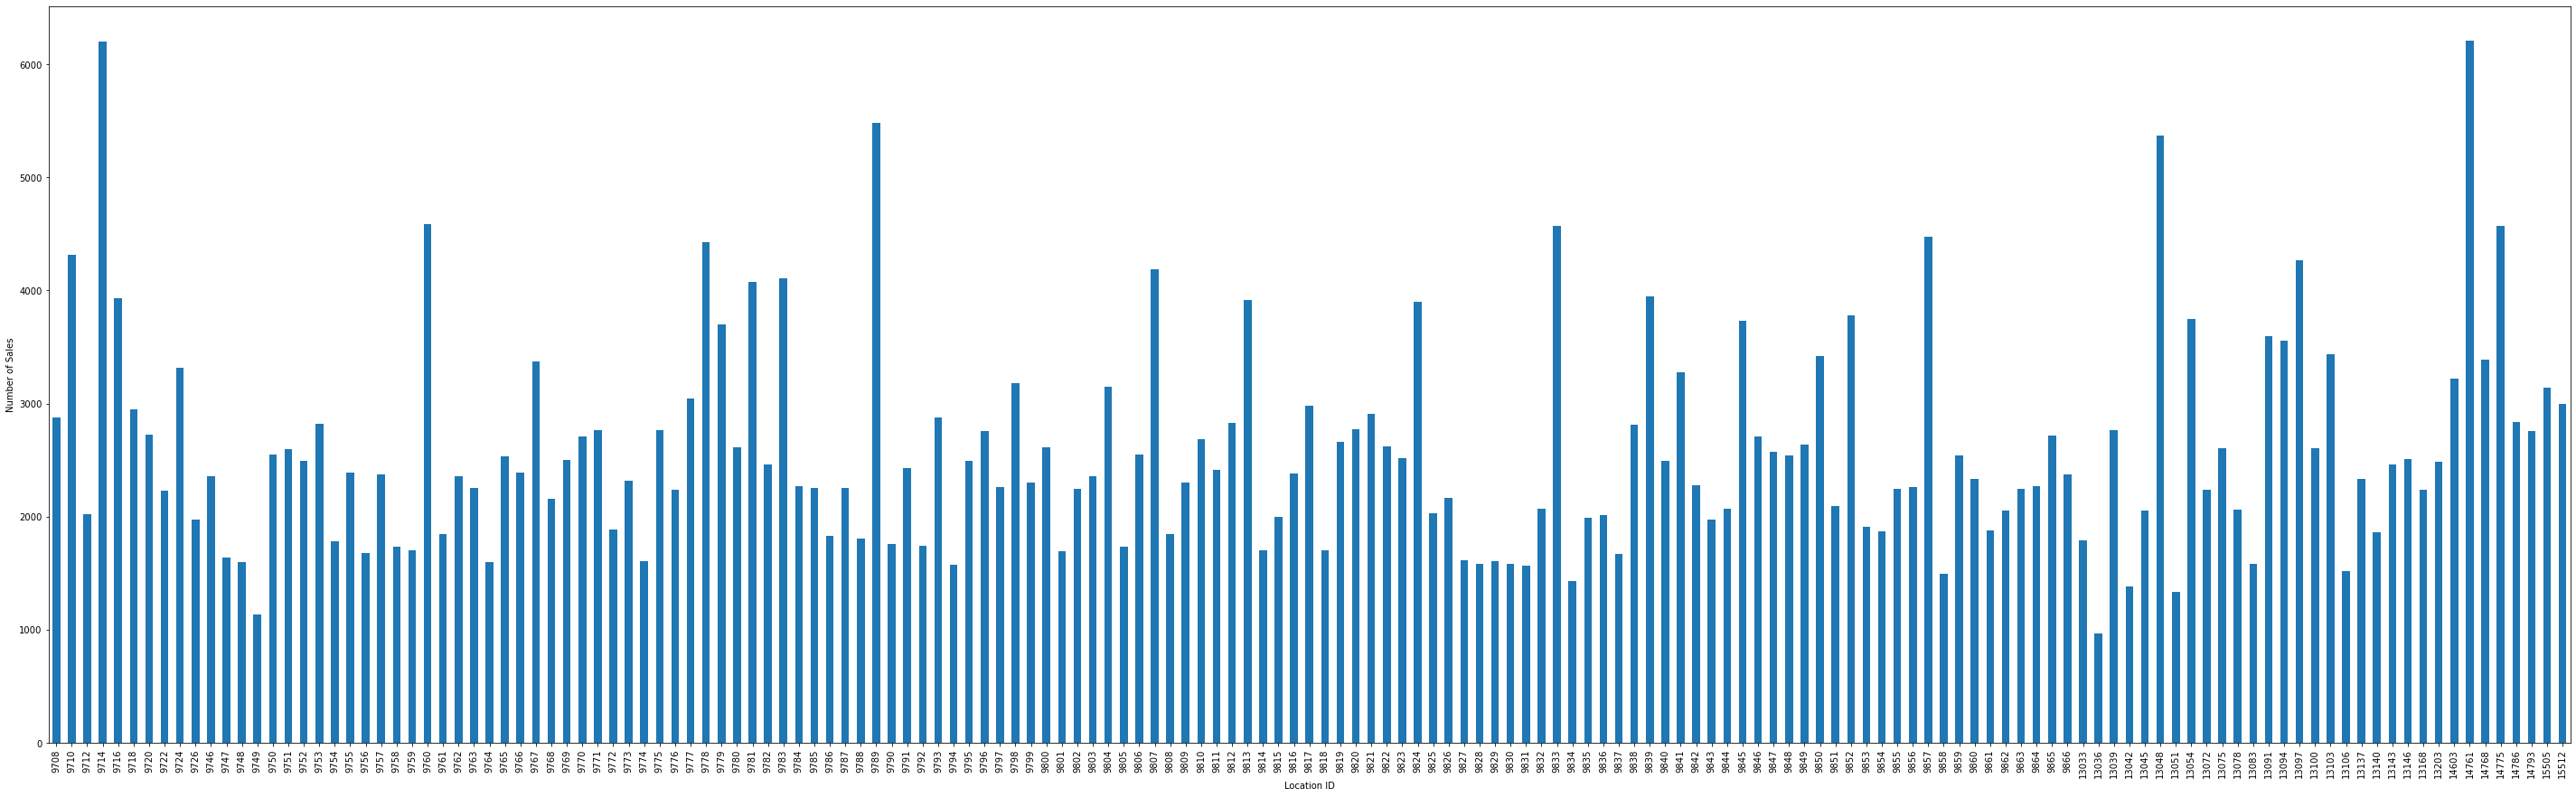

In [8]:
#Average sales per store based on location
by_store = df.groupby('location').agg({'sales': ['mean']})

by_store.plot.bar(xlabel = "Location ID", ylabel = "Number of Sales", legend=False, figsize =(50,15))
plt.show()


In [9]:
#groups by month of years FOR sales
monthly_df = df
monthly_df.date = monthly_df.date.apply(lambda x: str(x)[:-3])
monthly_df = monthly_df.groupby('date').agg({'sales': ['mean']}).reset_index()
monthly_df.date = pd.to_datetime(monthly_df.date)
monthly_df


,date,sales
,,mean
0,2017-12-01,3176.85
1,2018-01-01,2047.78
2,2018-02-01,2389.32
3,2018-03-01,2504.97
4,2018-04-01,2453.90
5,2018-05-01,2393.89
6,2018-06-01,2415.00
7,2018-07-01,2432.61
8,2018-08-01,2571.91


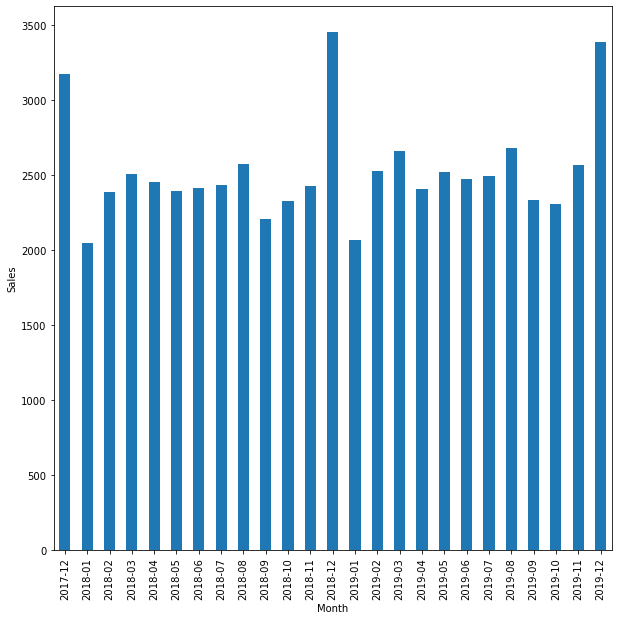

In [10]:
#Average sales for months
average_monthly_df = df.groupby([pd.Grouper(key='date')]).agg({'sales': ['mean']})

average_monthly_df.plot.bar(xlabel="Month", ylabel="Sales", legend=False, figsize=(10,10)),
plt.show()

In [11]:
#Average for monthly sales
avg_monthly_sales = monthly_df.sales.mean()
print("Overall average monthly sales: ", avg_monthly_sales)

Overall average monthly sales:  mean    2529.66
dtype: float64


In [12]:
#GROUPS BY YEAR AND LOCATION
location_df = monthly_df
location_df = df.groupby(['location', pd.Grouper(key='date')]).agg({'sales': ['mean', 'min', 'max']})
location_df

sales                  
                     mean      min      max
location date                              
9708     2017-12  4203.31  1395.70  8816.60
         2018-01  2037.29    91.60  7671.18
         2018-02  2495.49   828.71  6928.97
         2018-03  2558.63   853.86  6620.53
         2018-04  2643.44   815.88  7158.17
...                   ...      ...      ...
14786    2019-12  2789.34  1277.63  4864.17
14793    2019-11  2532.43    16.53  5116.32
         2019-12  2942.69  1332.47  5180.57
15505    2019-12  3139.75  1041.80  4959.11
15512    2019-12  2999.46     0.00  5015.43

[3249 rows x 3 columns]

In [13]:
#Split data in train and test data
import numpy as np
from sklearn.model_selection import train_test_split

monthly_df['date'] = pd.to_numeric(monthly_df.date)
y = monthly_df['sales'].values
X = monthly_df['date'].values
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, test_size = 0.4, random_state = 42)


In [14]:
#Create model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Coefficients: \n", lr.coef_)

print("Mean squared error: %.2f"
     %mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficients: 
 [[6.65451291e-15]]
Mean squared error: 150585.38
Coefficient of determination: -0.60


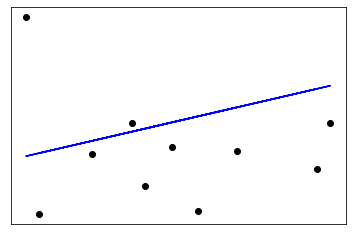

In [15]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()